# Task 4 - Project 7 - Data Analytics Fundamentals - repo link: https://github.com/VetterNic/datafun-07-ml-predictive

## Author: Nic Vetter
## Date: 10/05/2023

### Part 1: Linear Regression

### imports

In [306]:
import pandas as pd

In [307]:
import matplotlib.pyplot as plt

In [308]:
import sklearn

In [309]:
%matplotlib inline

In [310]:
from scipy import stats

In [311]:
import numpy as np

### Creating a Lambda and creating dataframe using the 'plot' method

In [312]:
c = lambda f: 5/9 * (f-32)

In [313]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [314]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

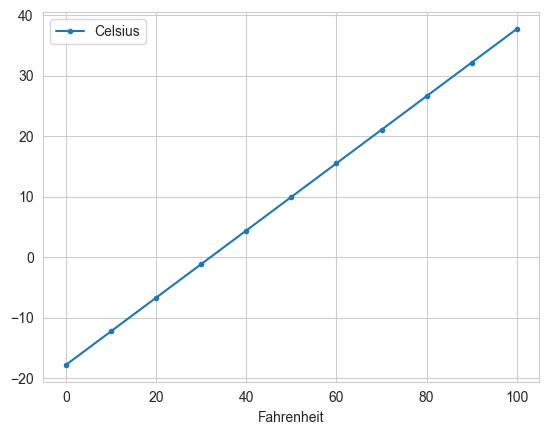

In [315]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

In [316]:
y_label = axes.set_ylabel('Celsius')

### Section 1: Load

In [317]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2: View

In [318]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [319]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Section 3: Cleaning

In [320]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [321]:
nyc.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [322]:
nyc.Date.dtype

dtype('int64')

In [323]:
nyc.Date = nyc.Date.floordiv(100)

In [324]:
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4: Describe

In [325]:
nyc.Temperature.describe()

count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64

### Section 5: Calculate Line using SciPy stats module linregress function

In [326]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

### Section 6: Predict

In [327]:
linear_regression.slope

0.01477136113296616

In [328]:
linear_regression.intercept

8.694993233674293

### Predicted average temperature in 2019 and 1890 based on our regression analysis

In [329]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [330]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Section 7: Plot - setting style, generating data regression plot and setting the y axis settings

In [331]:
import seaborn as sns

In [332]:
sns.set_style('whitegrid')

(10.0, 70.0)

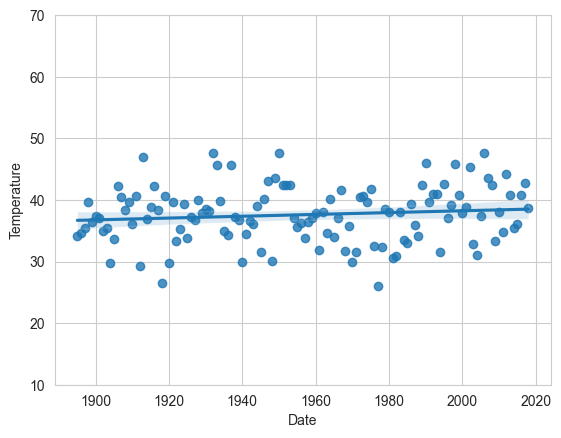

In [333]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

# Part 2: Machine Learning 

### The top of the data is shown below for verification

In [334]:
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Splitting the data

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

In [337]:
X_train.shape

(93, 1)

In [338]:
X_test.shape

(31, 1)

### Training the Model

In [339]:
from sklearn.linear_model import LinearRegression

In [340]:
linear_regression = LinearRegression()

In [341]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [342]:
linear_regression.coef_

array([0.01939167])

In [343]:
linear_regression.intercept_

-0.30779820252656975

### Testing the Model and predicting/estimating future and past temperatures

In [344]:
predicted = linear_regression.predict(X_test)

In [345]:
expected = y_test

In [346]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [347]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [348]:
predict(2019)

array([38.84399018])

In [349]:
predict(1890)

array([36.34246432])

### Visualizing the data set/regression line

c:\Users\Nic\OneDrive\Documents\IntroToPython\datafun-04-notebooks\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nic\OneDrive\Documents\IntroToPython\datafun-04-notebooks\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nic\OneDrive\Documents\IntroToPython\datafun-04-notebooks\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(10.0, 70.0)

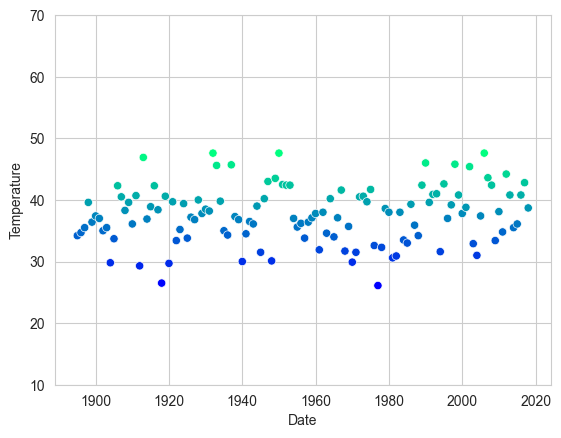

In [350]:
axes = sns.scatterplot(data = nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend = False)
axes.set_ylim(10,70)

### Displaying the regression line only

In [351]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [352]:
y = predict(x)

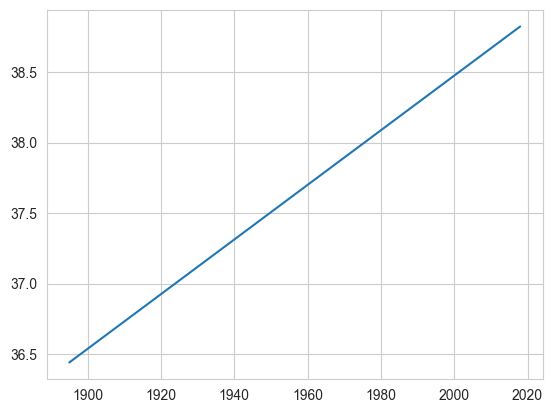

In [353]:
line = plt.plot(x, y)

### Reflection: The first method that we used was much easier and it made much more sense to me. The second method was kind of over my head in it's complexity. I just throught the first method was much easier for me to understand. I'm sure I will get more comfortable with Machine learning within the next course.